# Laboratorium 6 - Kwadratury

Zadanie 1. Wiadomo, że
$$
\int_{0}^{1} \frac{4}{1+x^2} dx = \pi. \quad (1)
$$
Powyższą równość można wykorzystać do obliczenia przybliżonej wartości $\pi$ poprzez całkowanie numeryczne.

### Zadanie 1 (a)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
import seaborn as sns
from IPython.display import display

sns.set_style("darkgrid")

In [13]:
def f(x):
    return 4 / (1 + x**2)


a = 0
b = 1
width = b - a
m_vec = np.arange(1, 26)
n_vec = 2**m_vec + 1

In [14]:
def quad_int(xs, f):
    s = 0
    for i in range(len(xs) - 1):
        dx = xs[i + 1] - xs[i]
        x = (xs[i] + xs[i + 1]) / 2
        s += f(x) * dx
    return s


def trap(xs, f):
    return integrate.trapezoid([f(xs)], xs)


def simpson(xs, f):
    return integrate.simpson(f(xs), xs)

In [15]:
values_list = []
formula_list = [quad_int, trap, simpson]

for formula in formula_list:
    values = []
    n_nodes = [2**m + 1 for m in m_vec]
    x_nodes = [np.linspace(a, b, n) for n in n_nodes]
    for nodes in x_nodes:
        value = formula(nodes, f)
        values.append(value)
    values_list.append(values)

In [16]:
errors_list = []

for i, values in enumerate(values_list):
    errors = []
    for j, value in enumerate(values):
        error = np.abs(value - np.pi) / np.pi
        errors.append(error)
    errors_list.append(errors)

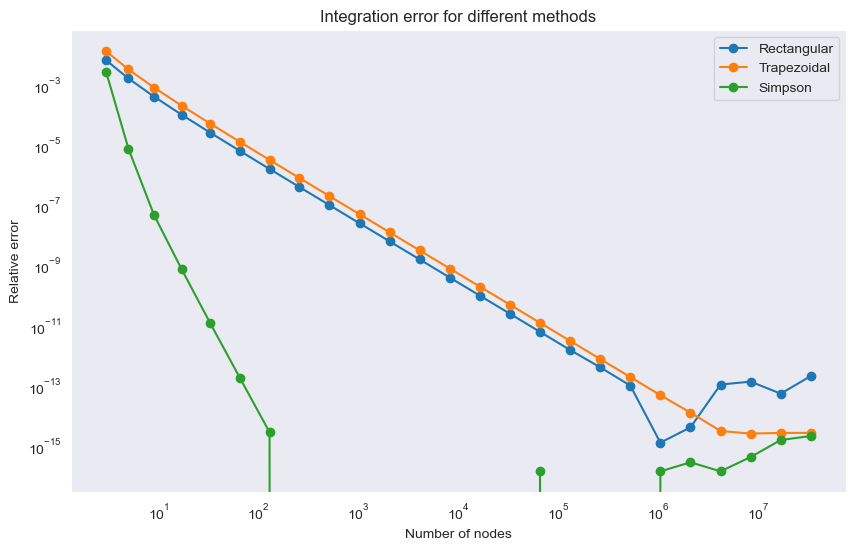

In [17]:
plt.figure(figsize=(10, 6))

plt.plot(2**m_vec + 1, errors_list[0], label="Rectangular", marker="o")
plt.plot(2**m_vec + 1, errors_list[1], label="Trapezoidal", marker="o")
plt.plot(2**m_vec + 1, errors_list[2], label="Simpson", marker="o")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of nodes")
plt.ylabel("Relative error")
plt.title("Integration error for different methods")
plt.legend()
plt.grid()
plt.show()

### Zadanie 1 (b)

In [18]:
hs = 1.0 / (2**m_vec)

min_list = []
for i, values in enumerate(errors_list):
    min_value = min(values)
    min_index = values.index(min_value)
    min_list.append((hs[min_index]))

min_df = pd.DataFrame(
    {
        "Method": ["Rectangular", "Trapezoidal", "Simpson"],
        "h_min": min_list,
    }
)
display(min_df)

,Method,h_min
0,Rectangular,9.536743e-07
1,Trapezoidal,1.192093e-07
2,Simpson,3.906250e-03


### Zadanie 1 (c)

In [19]:
emp_conv_list = [2, 2, 4]

In [20]:
h_vec = width / n_vec
rounding_errors_list = n_vec * np.finfo(np.float64).eps


def calculate_convergence_rate(errors):
    return [
        np.log(errors[i + 1] / errors[i]) / np.log(h_vec[i + 1] / h_vec[i])
        for i in range(len(errors) - 1)
        if rounding_errors_list[i] < errors[i]
    ]


conv_rect = calculate_convergence_rate(errors_list[0])
conv_trap = calculate_convergence_rate(errors_list[1])
conv_simp = calculate_convergence_rate(errors_list[2])

conv_df_rect = pd.DataFrame(conv_rect, columns=["Rectangular"])
display(conv_df_rect)
conv_df_trap = pd.DataFrame(conv_trap, columns=["Trapezoidal"])
display(conv_df_trap)
conv_df_simp = pd.DataFrame(conv_simp, columns=["Simpson"])
display(conv_df_simp)

,Rectangular
0,2.707131
1,2.358356
2,2.179738
3,2.090014
4,2.045045
5,2.022532
6,2.011269
7,2.005635
8,2.002818
9,2.001409


,Trapezoidal
0,2.710441
1,2.358425
2,2.179742
3,2.090014
4,2.045045
5,2.022532
6,2.011269
7,2.005635
8,2.002818
9,2.001409


,Simpson
0,11.432385
1,8.623452
2,6.536879
3,6.269862
4,6.135489
5,6.090216


# Zadanie 2.

In [21]:
m_vec_gauss = np.arange(1, 15)
n_vec_gauss = 2**m_vec_gauss + 1
leggaus_values = [np.polynomial.legendre.leggauss(n) for n in n_vec_gauss]
x_vec_gauss = [x_vec * 0.5 + 0.5 for x_vec, _ in leggaus_values]
y_vec_gauss = [w_vec for _, w_vec in leggaus_values]
gauss_values = [np.sum(f(x) * 0.5 * w) for x, w in zip(x_vec_gauss, y_vec_gauss)]
gauss_errors = [np.abs(value - np.pi) / np.pi for value in gauss_values]

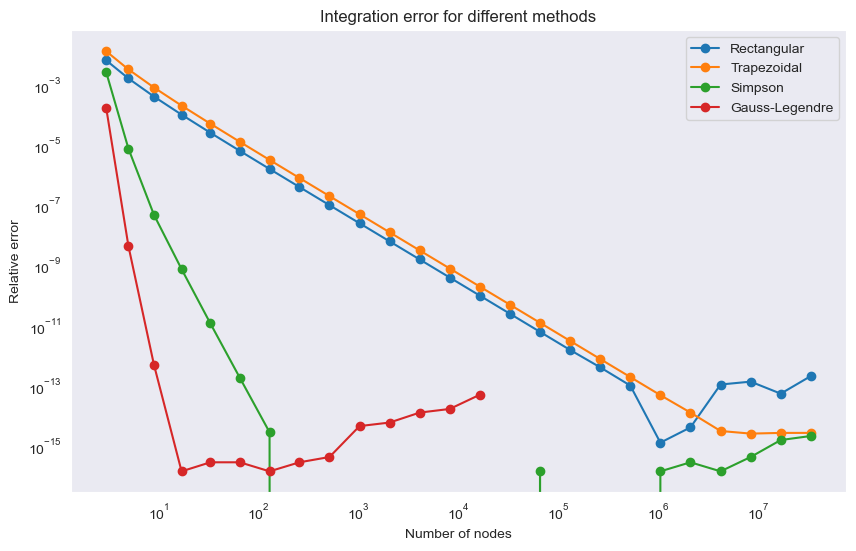

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(2**m_vec + 1, errors_list[0], label="Rectangular", marker="o")
plt.plot(2**m_vec + 1, errors_list[1], label="Trapezoidal", marker="o")
plt.plot(2**m_vec + 1, errors_list[2], label="Simpson", marker="o")
plt.plot(2**m_vec_gauss + 1, gauss_errors, label="Gauss-Legendre", marker="o")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of nodes")
plt.ylabel("Relative error")
plt.title("Integration error for different methods")
plt.legend()
plt.grid()
plt.show()